<a href="https://colab.research.google.com/github/masoume-pasebani/sentiment_analysis/blob/main/DeepLearning_FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install matplotlib==3.7.2

In [ ]:
! pip install hazm
! pip install stopwords_guilannlp

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fa.vec

--2023-08-21 09:25:09--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fa.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.33, 13.227.219.70, 13.227.219.59, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1105157170 (1.0G) [binary/octet-stream]
Saving to: ‘wiki.fa.vec’

wiki.fa.vec         100%[===================>]   1.03G  23.7MB/s    in 54s     

2023-08-21 09:26:03 (19.6 MB/s) - ‘wiki.fa.vec’ saved [1105157170/1105157170]



In [ ]:
import numpy as np
import pandas as pd
import codecs
from google.colab import files

from gensim.models import keyedvectors

from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Embedding, Dropout
from keras.layers import GlobalMaxPool1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import CuDNNLSTM, LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from stopwords_guilannlp import stopwords_output
from hazm import *

%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import plot_model
#from sklearn.matrics import f1.score

In [ ]:
upload = files.upload()

Saving test.csv to test (2).csv


In [ ]:
test = pd.read_csv('test.csv', index_col = None, header = None, encoding = "utf-8")

In [ ]:
x_test = test[0]
y_test = test[1]
print('Number of testing sentence: ', x_test.shape)
print('Number of testing label: ', y_test.shape)

Number of testing sentence:  (1854,)
Number of testing label:  (1854,)


In [ ]:
x_binary_test = []
y_binary_test = []

for i, j in enumerate(y_test):
  if int(j) != 0:
    if int(j) >0:
      y_binary_test.append(1)
      x_binary_test.append(x_test[i])
    else:
      y_binary_test.append(0)
      x_binary_test.append(x_test[i])

x_test = np.asarray(x_binary_test)
y_test = np.asarray(y_binary_test)

In [ ]:
original = pd.read_csv('original.csv', index_col = None, header = None, encoding = "utf-8")
balanced = pd.read_csv('balanced.csv', index_col=None, header=None, encoding="utf-8")
translation = pd.read_csv('translation.csv', index_col=None, header=None, encoding="utf-8")


In [ ]:
selected = translation
selected = selected.sample(frac=1).reset_index(drop=True)

In [ ]:
x_train = selected[0]
y_train = selected[1]
print("number of training sequence: ", x_train.shape)
print("number of training label: ", y_train.shape)


number of training sequence:  (14046,)
number of training label:  (14046,)


In [ ]:
x_binary_train = []
y_binary_train = []

for i, j in enumerate(y_train):
  if int(j) != 0:
    if int(j) >0:
      y_binary_train.append(1)
      x_binary_train.append(x_train[i])
    else:
      y_binary_train.append(0)
      x_binary_train.append(x_train[i])

x_train = np.asarray(x_binary_train)
y_train = np.asarray(y_binary_train)

In [ ]:
from collections import Counter
counter = Counter(y_train)
counter = dict(counter)
print(counter)

{1: 7856, 0: 2190}


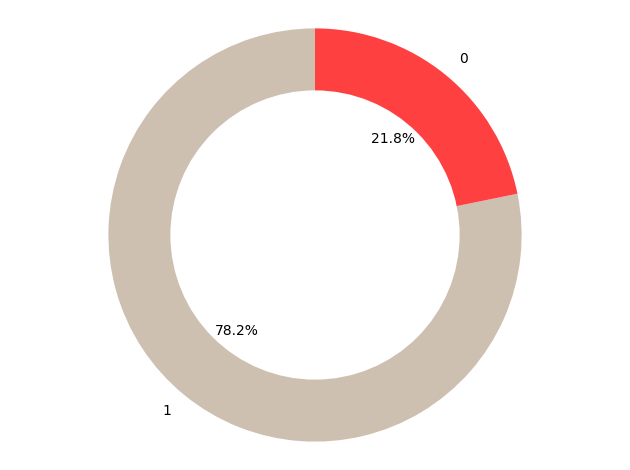

In [ ]:
labels = list(counter.keys())
sizes = list(counter.values())

colors = ['#CDC0B0', '#FF4040', '#8B5F65', '#FFAEB9', '#CD2626']
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)

center = plt.Circle((0,0), 0.70, fc='white')
fig1 = plt.gcf()
fig1.gca().add_artist(center)

ax.axis('equal')
plt.tight_layout()

plt.show()

In [ ]:
Punctuations_mark = ['،', '.', '؛', ':', ';', '"']
normalizer = Normalizer()
lemmatizer = Lemmatizer()

def clean(doc):
  doc = normalizer.normalize(doc)
  tokenized = word_tokenize(doc)
  tokens = []

  for t in tokenized:
    temp = t
    for p in Punctuations_mark:
      temp = temp.replace(p, '')
    tokens.append(temp)

  tokens = [w for w in tokens if not len(w) <= 1]
  tokens = [w for w in tokens if not w.isdigit()]
  tokens = [lemmatizer.lemmatize(w) for w in tokens]
  tokens = ' '.join(tokens)

  return tokens

In [ ]:
EMBEDDING_FILE = 'wiki.fa.vec'

def import_def(file_address):
  ft_model = keyedvectors.load_word2vec_format(file_address)

  ft_words = []
  for ft_word in ft_model.key_to_index:
    ft_words.append(ft_word)
  return ft_model, ft_words

ft_model, ft_words = import_def(EMBEDDING_FILE)

In [93]:
embed_size = 300
embedding_list = list()
for w in ft_words:
  embedding_list.append(ft_model[w])

  all_embedding = np.stack(embedding_list)
  emb_mean, emb_std = all_embedding.mean(), all_embedding.std()


KeyboardInterrupt: ignored

In [ ]:
train_doc = np.empty_like(x_train)
for i, d in enumerate(x_train):
  train_doc[i] = clean(d)

  test_doc = np.empty_like(x_test)
  for i, d in enumerate(x_test):
    test_docs[i] = clean(d)


NameError: ignored